# Modelo de Regressão Linear Simples

1 – Análise descritiva

2 – Análise de correlação

3 – Modelo de regressão

4 – Analise de resíduos

5 – Análise do Modelo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

### 1 – Análise descritiva

Carregando a base de dados

In [2]:
dados = pd.read_csv('1 - propaganda.csv')

Analise descritiva das medidas de tendencia central via tabela

In [3]:
dados.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Verificação do tamanho da base de dados

In [4]:
dados.shape

(200, 4)

Visualização das 5 primeiras linhas 

In [5]:
dados.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Verificação do tipo das variáveis

In [6]:
dados.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

Verificação de valores ausentes e nulos

In [7]:
dados.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

A base de dados não possui dados faltantes ou nulos e todos os dados são do mesmo tipo.

C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\anail\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

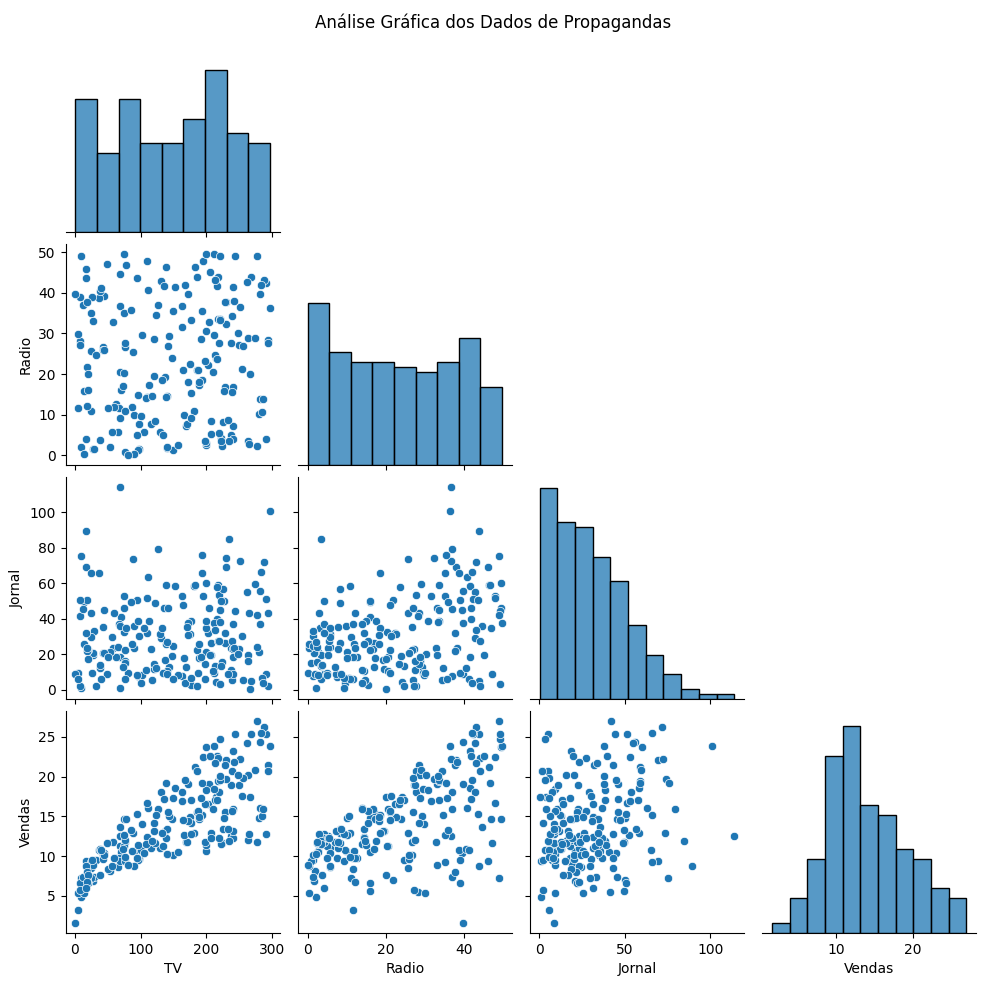

In [8]:
# Análise gráfica - Pairplot
sns.pairplot(dados, corner=True) # corner corta metade do gráfico pois é simetrico.
plt.suptitle("Análise Gráfica dos Dados de Propagandas")
plt.show()

Analise grafica para verificar a disposição dos dados e relação entre as variáveis

### 2 – Calculo de correlação


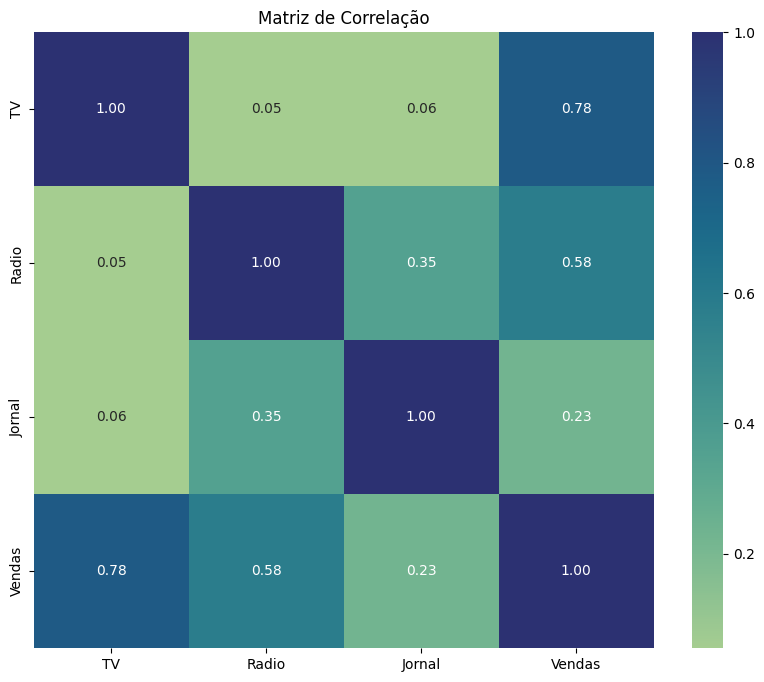

In [9]:
# Calcula a matriz de correlação
correlation_matrix = dados.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


Podemos ver claramente que a correlacão de Vendas com propagandas em TV é maior que na Radio que é maior que no Jornal

### 3 – Faça o modelo de regressão

In [10]:
# Definindo a variável dependente (Vendas) e independente (TV)
X = dados['TV']  # Variável independente (TV)
X_radio = dados['Radio']
X_jornal = dados['Jornal']
y = dados['Vendas']  # Variável dependente (Vendas)

# Adicionando uma constante à variável independente
X = sm.add_constant(X)
X_radio = sm.add_constant(X_radio)
X_jornal = sm.add_constant(X_jornal)

# Ajustando o modelo de regressão linear
modelo_tv = sm.OLS(y, X).fit()
modelo_radio = sm.OLS(y, X_radio).fit()
modelo_jornal = sm.OLS(y, X_jornal).fit()

# Sumário do modelo
modelo_tv_summary = modelo_tv.summary()
modelo_radio_summary = modelo_radio.summary()
modelo_jornal_summary = modelo_jornal.summary()


# sm.OLS() é usado para ajustar o modelo de regressão linear ordinária.
# sm.add_constant() é necessário pois o OLS não adiciona automaticamente a constante (intercepto).


### 4 – realize a analise de resíduos


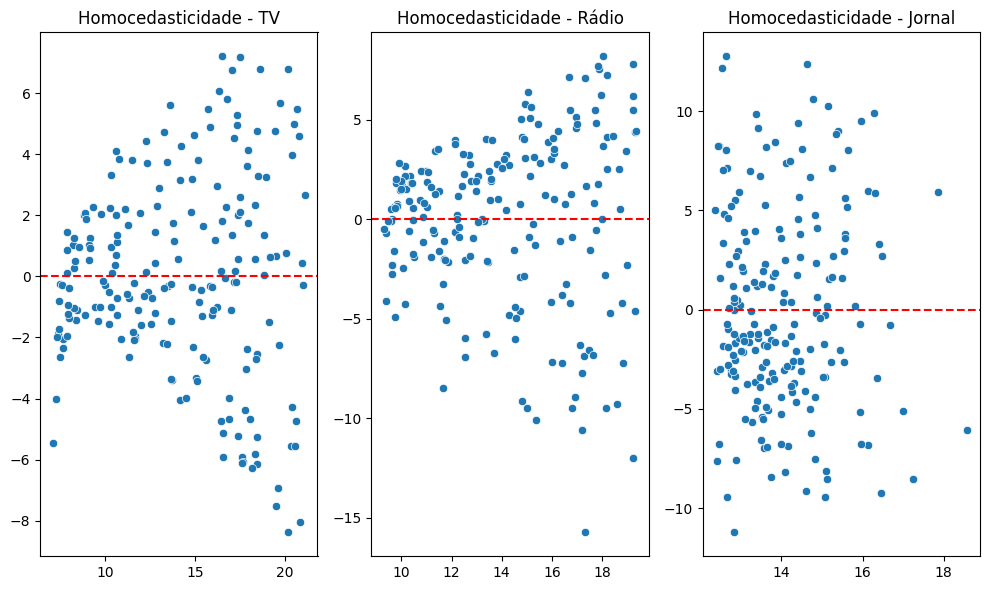

In [11]:
# Resíduos dos modelos
residuos_tv = modelo_tv.resid
residuos_radio = modelo_radio.resid
residuos_jornal = modelo_jornal.resid

# Gráfico de homocedasticidade
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=modelo_tv.fittedvalues, y=residuos_tv)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - TV')

plt.subplot(1, 3, 2)
sns.scatterplot(x=modelo_radio.fittedvalues, y=residuos_radio)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Rádio')

plt.subplot(1, 3, 3)
sns.scatterplot(x=modelo_jornal.fittedvalues, y=residuos_jornal)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homocedasticidade - Jornal')

plt.tight_layout()
plt.show()

No grafico 3, observa-se que os pontos estão aleatoriamente espalhados em torno da linha zero, com uma faixa constante de dispersão, isso pode inficar homocedasticidade. 
Já nos gráficos 1 e 2, existe um padrão claro e uma ampla dispersão, podendo indicar heterocedasticidade.

#### Teste de Homocedasticidade com Breusch-Pagan

In [12]:
# Calcula os resíduos do modelo
# Criação de uma lista de tuplas com os modelos e seus respectivos nomes
modelos = [
    ("modelo_tv", modelo_tv, dados['TV']),
    ("modelo_radio", modelo_radio, dados['Radio']),
    ("modelo_jornal", modelo_jornal, dados['Jornal'])
]

for nome, modelo,dados in modelos:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {format(estatistica)}')
    print(f'p-valor: {p}')
    print(f'f-valor: {fp}')
    print(f'f_p-valor: {f}')


Estatísticas de teste para modelo_tv: 48.037965662293594
p-valor: 4.180455907755742e-12
f-valor: 1.761845142569593e-13
f_p-valor: 62.59140477151424
Estatísticas de teste para modelo_radio: 36.64580517401952
p-valor: 1.4166353247317972e-09
f-valor: 2.572140228519948e-10
f_p-valor: 44.418017132559505
Estatísticas de teste para modelo_jornal: 2.471728538393436
p-valor: 0.11591039135561708
f-valor: 0.11707253378081109
f_p-valor: 2.477631414382237


#### Breusch-Pagan:
Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.
modelo_tv     p-valor < 0.05
modelo_radio  p-valor < 0.05
modelo_jornal p-valor > 0.05

#### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [13]:
for nome, modelo,dados in modelos:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {format(estatistica_shapiro)}')
    print('p-valor: {}'.format(p_shapiro))

Estatísticas de teste modelo_tv: 0.9905304908752441
p-valor: 0.21331307291984558
Estatísticas de teste modelo_radio: 0.9607170820236206
p-valor: 2.366568696743343e-05
Estatísticas de teste modelo_jornal: 0.9819672703742981
p-valor: 0.011393697932362556


#### Shapiro:
Se p-valor do shapiro é superior a 0.05,isso indica que os resíduos seguem aproximadamente uma distribuição normal.

- modelo_tv     p-valor > 0.05
- modelo_radio  p-valor < 0.05
- modelo_jornal p-valor < 0.05

#### Análise de normalidade QQ-plot

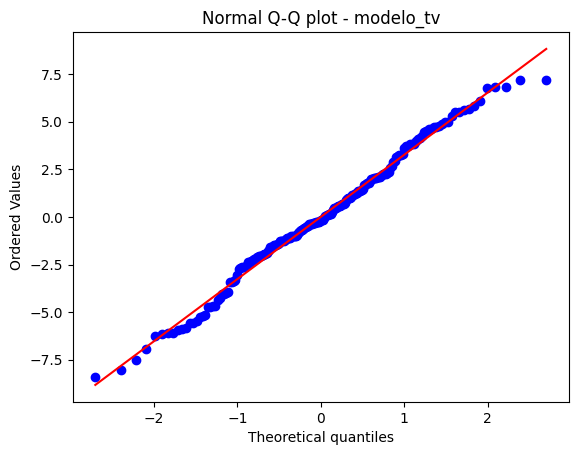

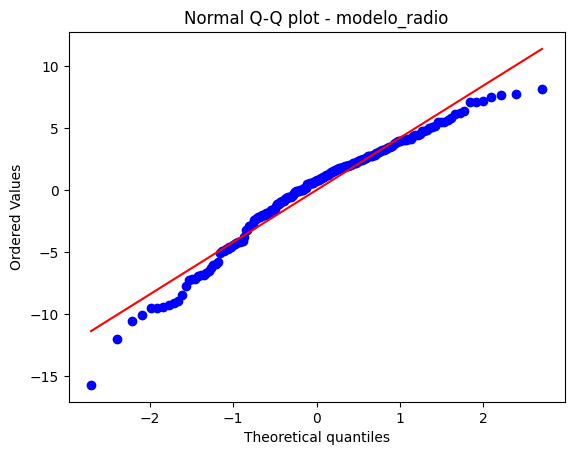

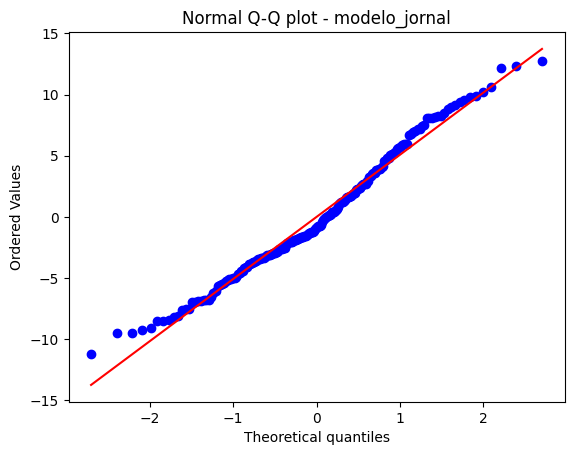

In [14]:
 for nome, modelo, dados in modelos:
    stats.probplot(modelo.resid,dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot - {nome}")
    plt.show()

Aparentemente todos se aproximam da reta e parecem ser normais.

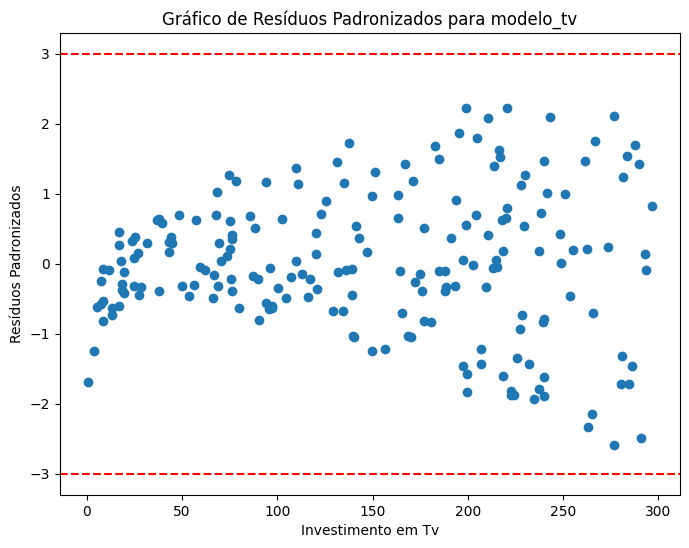

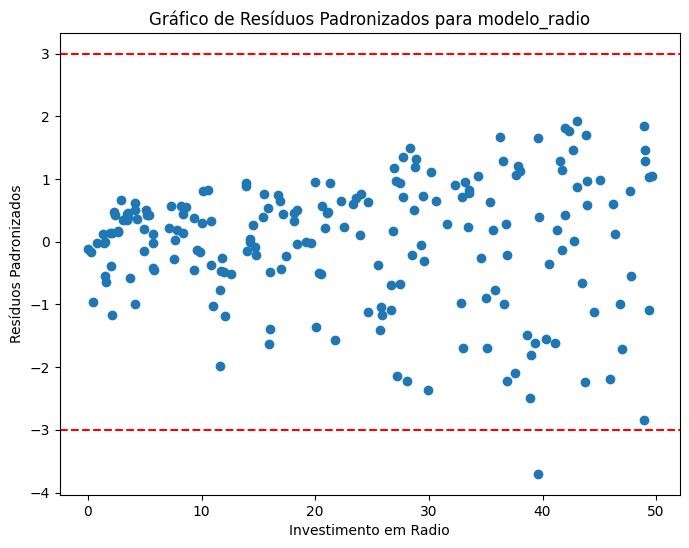

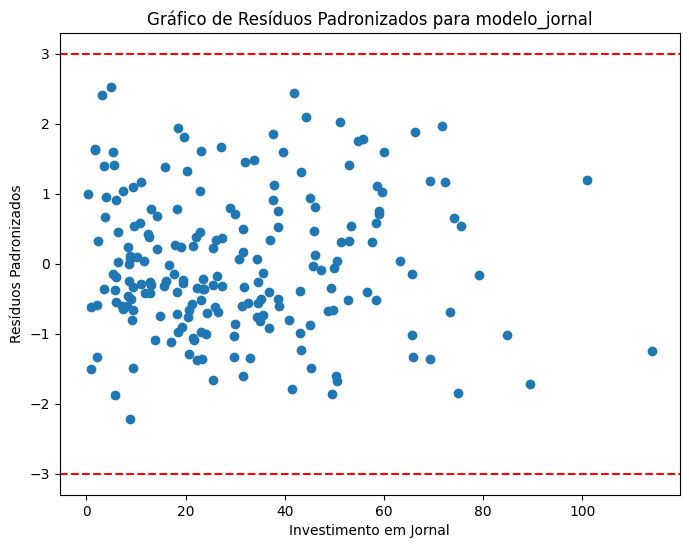

In [15]:
 for nome, modelo, dados in modelos:
    residuos_padronizados = modelo.get_influence().resid_studentized_internal
    
    # Cria um gráfico de resíduos
    plt.figure(figsize=(8, 6))
    plt.scatter(dados, residuos_padronizados)
    plt.axhline(y=3, color='r', linestyle='--')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.title(f'Gráfico de Resíduos Padronizados para {nome}')
    plt.xlabel('Investimento em ' + nome.split("_")[1].capitalize())
    plt.ylabel('Resíduos Padronizados')
    
    # Mostrar o gráfico
    plt.show()

Nenhum dos residuos apresenta um outlier além de 3 e -3

#### Análise geral dos residuos: 
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|---------|----------|
| TV      | ❌                                | ✅                          | ✅       | ✅        |
| Rádio   | ❌                                | ❌                          | ❌       | ❌        |
| Jornal  | ✅                                | ❌                          | ❌       | ✅        |

### 5 – Análise do Modelo

In [16]:
for nome, modelo, dados in modelos:
    print(str(modelo.summary()))

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        19:39:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

| Modelo  | Teste T (Significância dos Coeficientes) | Teste F (Significância Global) | R² Ajustado |
|---------|-----------------------------------------|--------------------------------|-------------|
| TV      | ✅                                        | ✅                              | 0.610       |
| Rádio   | ✅                                        | ✅                              | 0.329       |
| Jornal  | ✅                                        | ✅                              | 0.047       |

#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Nos resultados fornecidos, todos os modelos mostraram coeficientes significativos (p-valor < 0.05 para os coeficientes de TV, Rádio e Jornal).

#### Teste F:
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Todos os modelos (TV, Rádio e Jornal) apresentaram p-valores baixos no Teste F, indicando que são estatisticamente significativos.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo de TV tem um R² Ajustado de 0.610, indicando que cerca de 61% da variabilidade em Vendas é explicada pelo modelo. Os modelos de Rádio e Jornal têm R² Ajustado mais baixos, indicando um ajuste menos eficaz.

### Grafico dos medelos ajustados

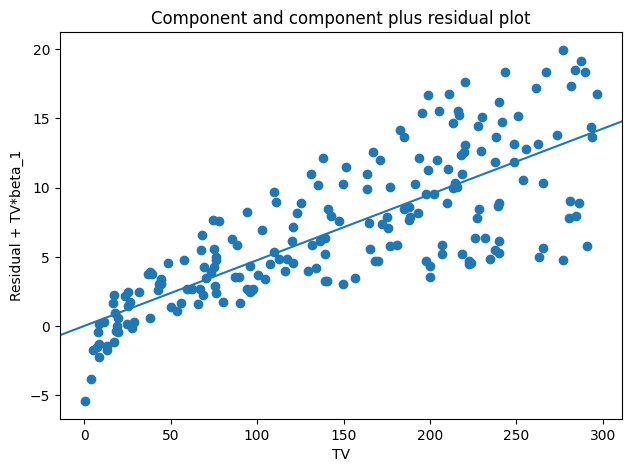

In [17]:
fig = sm.graphics.plot_ccpr(modelo_tv, "TV")
fig.tight_layout(pad=1.0)

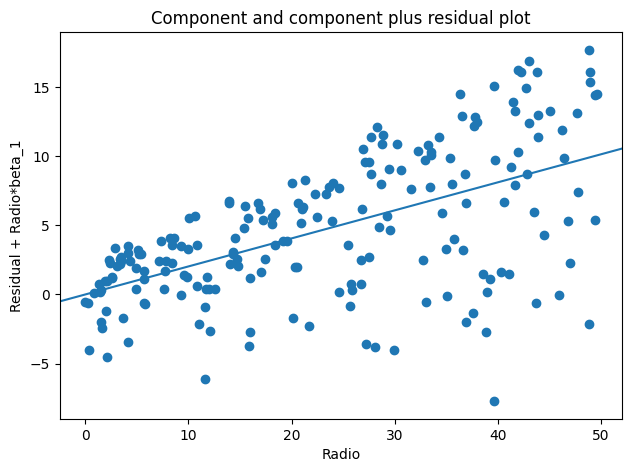

In [18]:
fig = sm.graphics.plot_ccpr(modelo_radio, "Radio")
fig.tight_layout(pad=1.0)

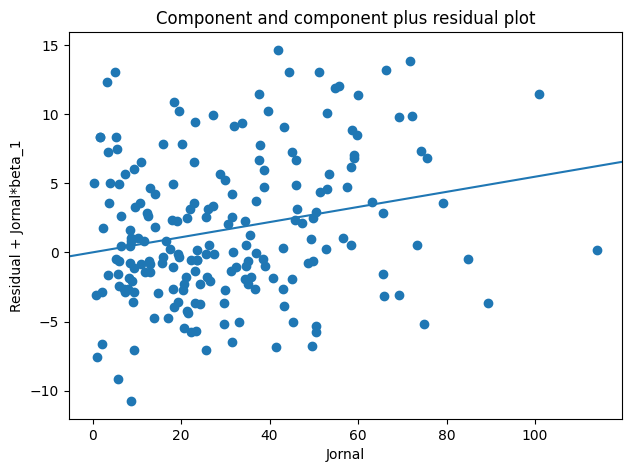

In [19]:
fig = sm.graphics.plot_ccpr(modelo_jornal, "Jornal")
fig.tight_layout(pad=1.0)